# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview

mouse_merge_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [93]:
# Checking the number of mice.
len(mouse_merge_df['Mouse ID'].value_counts())

249

In [94]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse = mouse_merge_df.loc[mouse_merge_df.duplicated(subset = ["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicate_mouse



array(['g989'], dtype=object)

In [95]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = mouse_merge_df.loc[mouse_merge_df["Mouse ID"] == "g989" , :]
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [96]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_merge_df.loc[(mouse_merge_df["Mouse ID"]!= "g989"), :]
clean_mouse_df

#clean_df = combined_df[combined_df['Mouse ID'].isin(dup_mice_ID)==False]
#clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [97]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_df["Mouse ID"].value_counts())

248

## Summary Statistics

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).mean()

median = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).median()

variance = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).var()

stdev = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).std()

sem = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.

summary_stat_df = pd.DataFrame({"Mean Tumor Volume": mean, 
                                "Median Tumor Volume": median,
                                "Tumor Volume Variance": variance, 
                                "Tumor Volume Standard Deviation": stdev,
                                "Tumor Volume SEM": sem})

summary_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [99]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method (.agg), produce the same summary statistics in a single line
summary_stat_agg_df = clean_mouse_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_stat_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

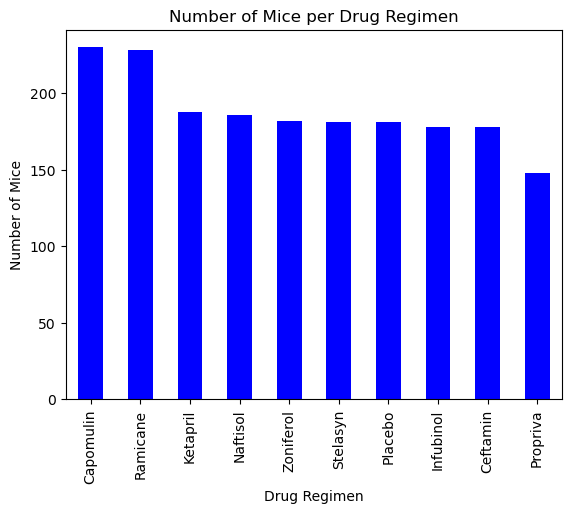

In [100]:
# Create rows and columns by counting the number of mice per drug
mice_count_per_drug= clean_mouse_df["Drug Regimen"].value_counts()
mice_count_per_drug

# Create a Pandas bar plot based off of the group series

mice_count_per_drug.plot.bar(color="blue")  

# Set the x and y axis labels and the title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

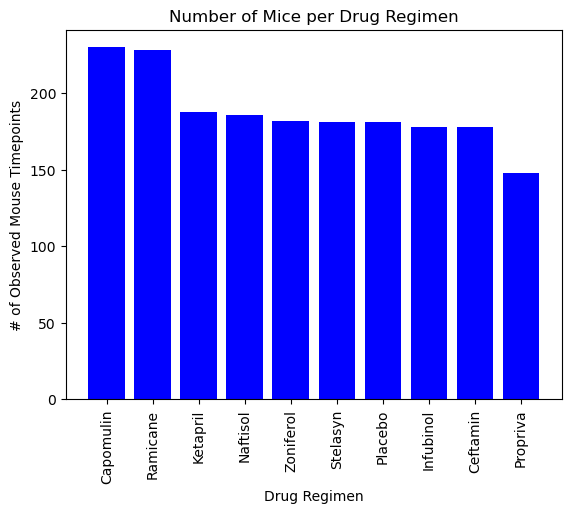

In [101]:
# Identify the x and y axis
x_axis = mice_count_per_drug.index.values
y_axis = mice_count_per_drug.values

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x_axis, y_axis, color="blue", align="center")

# Create the x and y axis labels and adjust the xticks
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Drug Regimen")


Text(0.5, 1.0, 'Female vs. Male Mice')

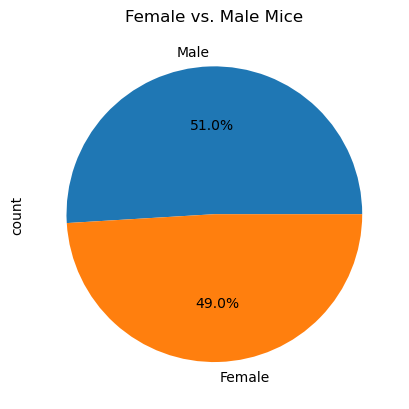

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Get the gender counts
mice_gender_df = clean_mouse_df["Sex"].value_counts()
mice_gender_df

# Create a pie plot with pandas
mice_gender_df.plot.pie(autopct= "%1.1f%%")

# Add pie plot title
plt.title("Female vs. Male Mice")


Text(0, 0.5, 'sex count')

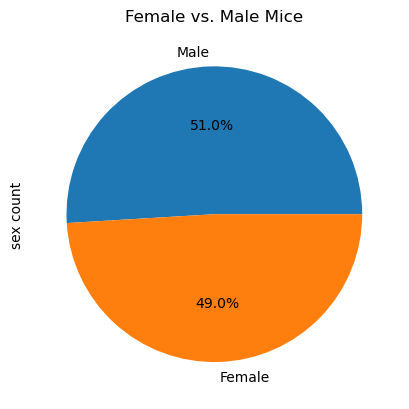

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create labels 
labels = ["Male", "Female"]

# Calculate the sizes of each label/category

total_mice = mice_gender_df["Male"] + mice_gender_df["Female"]

proportions = [mice_gender_df["Male"], mice_gender_df["Female"]]

sizes = [((gender_count/total_mice)*100) for gender_count in proportions]

# Create the pie plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Female vs. Male Mice")
plt.ylabel("sex count")


## Quartiles, Outliers and Boxplots

In [104]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

#last_timepoints_per_mouse = clean_mouse_df.groupby("Mouse ID")["Timepoint"].max()
# Reset the index
last_timepoints_per_mouse = clean_mouse_df.groupby(["Mouse ID"])['Timepoint'].max()
last_timepoints_per_mouse = last_timepoints_per_mouse.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint for the drug

merged_clean_timepoints = last_timepoints_per_mouse.merge(clean_mouse_df,on=['Mouse ID','Timepoint'],how="left")
merged_clean_timepoints

#clean_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [132]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. 
# Append the resulting final tumor volumes for each drug to the empty list

for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes

    total_vol_per_drug = merged_clean_timepoints.loc[merged_clean_timepoints["Drug Regimen"] == drug, 'Tumor Volume (mm3)']

     # add subset (append the resulting final tumor volumes for each drug to the tumor_vol_data list)

    tumor_vol_data.append(total_vol_per_drug)

# Calculate the IQR and quantitatively determine if there are any potential outliers.

#Define a function for getting the iqr of each list in tumor_vol_data so you don't have to go through the whole thing and then use it in a for loop 
#def get_outliers():
    outlierslist = []
    for vol_data in tumor_vol_data:

        quartiles = total_vol_per_drug.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)

        # Determine outliers using upper and lower bounds
        outliers = total_vol_per_drug.loc[(total_vol_per_drug < lower_bound) | (total_vol_per_drug > upper_bound)]
        outlierslist.append(outliers)
    print(f"{drug}'s potential outliers: {outliers}")

outlierslist

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


[Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64)]

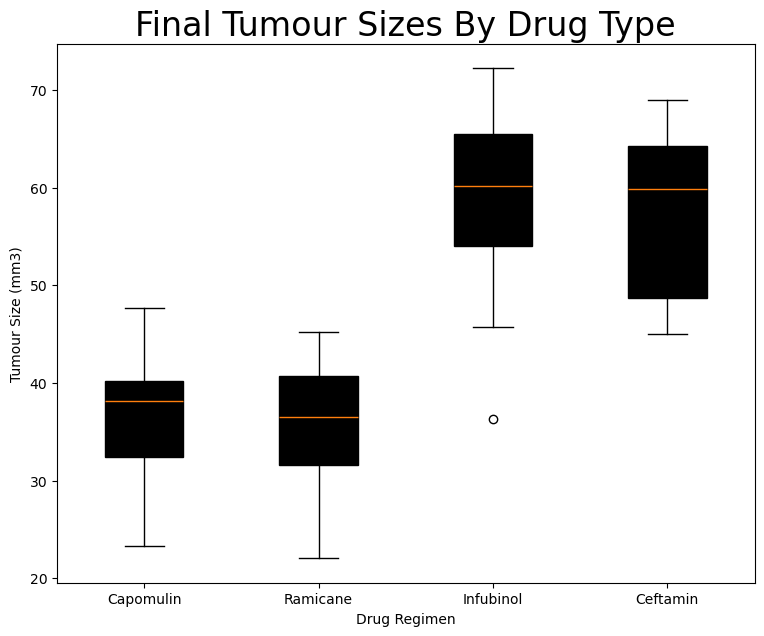

In [137]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red", markersize=10)

plt.subplots(figsize=(9,7))
plt.title('Final Tumour Sizes By Drug Type', fontsize = 24) 
plt.xlabel('Drug Regimen') 
plt.ylabel('Tumour Size (mm3)') 
plt.boxplot(tumor_vol_data, patch_artist=True, boxprops=dict(facecolor='black'), showmeans=False, flierprops=outliers)
plt.xticks([1,2,3,4], treatments)

#plt.boxplot(outlierslist,labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_dot)
#plt.ylabel('Final Tumor Volume (mm3)')
#plt.title('Tumor Volume at Selected Mouse')


plt.show()


## Line and Scatter Plots

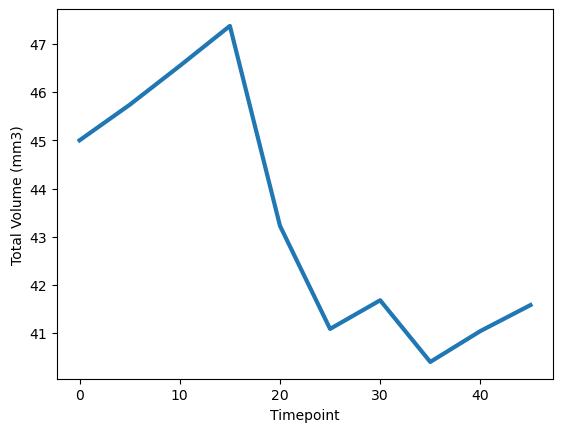

In [138]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Random mouse found from clean_mouse data frame
capomulin_mouse_r944 = clean_mouse_df.loc[clean_mouse_df["Mouse ID"] == "r944", :]

#set x and y axis
x_axis = capomulin_mouse_r944["Timepoint"]
y_axis = capomulin_mouse_r944["Tumor Volume (mm3)"]

plt.xlabel("Timepoint")
plt.ylabel("Total Volume (mm3)")
plt.plot(x_axis, y_axis, linewidth=3)

In [108]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [109]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
